In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns

# import from scripts
import os
os.chdir(os.path.expanduser("C:\\Users\\ipoch\\Documents\\repos\\isttc\\scripts"))
from calculate_acf import acf_pearsonr_trial_avg, acf_sttc_trial_avg

### Get and prep the data

In [2]:
area = 'pfdl' # pfp

In [3]:
# # binned data
# results_folder = 'D:\\projects_q_30_10_2024\\isttc\\results\\monkey\\'
# save_folder_binned = results_folder + 'fixation_period_1000ms\\binned\\' + area + '\\acf\\'

# csv_data_file = results_folder + 'data_' + area + '_fixon_1500ms_fixation_with_empty_binned_50ms.csv'
# with open(csv_data_file, newline='') as f:
#     reader = csv.reader(f)
#     sua_binned_list = list(reader)
    
# n_binned_spike_trains = len(sua_binned_list)
# print('N spike_trains in {}: {}'.format(area, n_binned_spike_trains))

# # transform list to an array and to a dataframe 
# sua_binned_array = np.array(sua_binned_list)
# sua_binned_array = sua_binned_array[:, :-1-9] # for 1000 calc

# bin_cols = ['bin_' + str(i) for i in range(sua_binned_array.shape[1]-3)]
# sua_binned_df = pd.DataFrame(sua_binned_array, columns=['unit_id', 'trial_id','condition_id'] + bin_cols)
# sua_binned_df = sua_binned_df.astype('int')

# n_binned_units = len(sua_binned_df['unit_id'].unique())
# print('n units {}'.format(n_binned_units))

# sua_binned_df.head(2)

In [4]:
# non-binned data
results_folder = 'D:\\projects_q_30_10_2024\\isttc\\results\\monkey\\'
save_folder_non_binned = results_folder + 'fixation_period_1000ms\\non_binned\\' + area + '\\acf\\'

csv_data_file = results_folder + 'data_' + area + '_fixon_1500ms_with_empty_fixation.csv'
with open(csv_data_file, newline='') as f:
    reader = csv.reader(f)
    sua_non_binned_list = list(reader)
    
n_non_binned_spike_trains = len(sua_non_binned_list)
print('N spike_trains in {}: {}'.format(area, n_non_binned_spike_trains))

# transform data to a dict, key is unit_id, values is a list of spike trains (one spike train per trial)
units_dict = {}
for spike_train in sua_non_binned_list:
    spike_train_ = np.asarray(spike_train[3:]).astype(int)
    spike_train_1000 = spike_train_[spike_train_ <= 1000]
    if int(spike_train[0]) in units_dict:
        units_dict[int(spike_train[0])].append(spike_train_1000)
    else:
        units_dict[int(spike_train[0])] = []
        units_dict[int(spike_train[0])].append(spike_train_1000)

n_non_binned_units = len(units_dict)
print('n units {}'.format(n_non_binned_units))

N spike_trains in pfdl: 47339
n units 544


### Calculate autocorrelation function

In [5]:
n_lags = 20
acf_cols = ['acf_' + str(i) for i in range(n_lags)]
print('acf_cols {}'.format(acf_cols))

acf_cols ['acf_0', 'acf_1', 'acf_2', 'acf_3', 'acf_4', 'acf_5', 'acf_6', 'acf_7', 'acf_8', 'acf_9', 'acf_10', 'acf_11', 'acf_12', 'acf_13', 'acf_14', 'acf_15', 'acf_16', 'acf_17', 'acf_18', 'acf_19']


#### Using Pearson (as in papers)

In [6]:
# acf_average_trial_pearsonr_l = []
# acf_matrix_pearsonr_l = []

# unit_id_l = sua_binned_df['unit_id'].unique()
# unit_id_calc_l = []

# for unit in unit_id_l:
#     print('Processing unit {}'.format(unit))
#     sua_binned_unit_df = sua_binned_df.query('unit_id == @unit')
#     print('N trials {}'.format(len(sua_binned_unit_df)))
#     if len(sua_binned_unit_df) <= 1:
#         print('ONLY 1 TRIAL: can not calculate, skipping...')
#     else:
#         acf_matrix, acf_average = acf_pearsonr_trial_avg(sua_binned_unit_df[bin_cols].values, n_lags)
#         acf_average_trial_pearsonr_l.append(acf_average)
#         acf_matrix_pearsonr_l.append(acf_matrix)
#         unit_id_calc_l.append(unit)

# acf_average_trial_pearsonr_df = pd.DataFrame(np.array(acf_average_trial_pearsonr_l), columns=acf_cols)
# acf_average_trial_pearsonr_df.insert(0, 'unit_id', unit_id_calc_l)

# print('NaNs in acf {}'.format(acf_average_trial_pearsonr_df.isnull().any().any()))
# acf_average_trial_pearsonr_df.head(3)

#### Using STTC

In [7]:
acf_average_trial_sttc_l = []
acf_matrix_sttc_l = []
unit_id_calc_l = []

for k,v in units_dict.items():
    print('Processing unit {}, n trials {}'.format(k, len(v)))
    if len(v) <= 1:
        print('ONLY 1 TRIAL: can not calculate, skipping...')
    else:
        acf_matrix, acf_average = acf_sttc_trial_avg(v, zero_padding_len_=51)
        acf_average_trial_sttc_l.append(acf_average)
        acf_matrix_sttc_l.append(acf_matrix)
        unit_id_calc_l.append(k)

acf_average_trial_sttc_df = pd.DataFrame(np.array(acf_average_trial_sttc_l), columns=acf_cols)
acf_average_trial_sttc_df.insert(0, 'unit_id', unit_id_calc_l)

print('NaNs in acf {}'.format(acf_average_trial_sttc_df.isnull().any().any()))
acf_average_trial_sttc_df.head(3)

Processing unit 0, n trials 92
n_bins to use 20
0 4691 92
STTC : 0.34015345633477806
STTC : 0.31748988309484527
STTC : 0.2662341581728557
STTC : 0.17950394371979858
STTC : 0.29726414923352557
STTC : 0.15010895584935308
STTC : 0.18871425145899456
STTC : 0.031420617294183543
STTC : 0.08991760960230233
STTC : 0.007844946319342357
STTC : -0.03271471092943527
STTC : 0.10386677396797396
STTC : 0.23824360091863708
STTC : 0.11625449785936505
STTC : 0.03108173689098218
STTC : 0.08274090364594783
STTC : 0.15083318346761898
STTC : 0.14828762830931586
STTC : -0.022704922295105907
STTC : 0.4677015477183696
STTC : 0.33533219457444574
STTC : 0.22042084281969934
STTC : 0.22151457153531331
STTC : 0.24532690429225773
STTC : 0.20412769529452005
STTC : 0.025947429765505722
STTC : 0.17520021369051572
STTC : 0.15232141212606504
STTC : 0.20040225682592905
STTC : 0.12057022849368124
STTC : 0.2910547868582585
STTC : 0.0693195795088905
STTC : 0.1659091106684213
STTC : 0.06668472497480167
STTC : 0.12865666165174

,unit_id,acf_0,acf_1,acf_2,acf_3,acf_4,acf_5,acf_6,acf_7,acf_8,...,acf_10,acf_11,acf_12,acf_13,acf_14,acf_15,acf_16,acf_17,acf_18,acf_19
0,0,1.0,0.323739,0.249452,0.229305,0.220280,0.153785,0.135725,0.124157,0.116047,...,0.117242,0.081267,0.128968,0.097831,0.114048,0.084792,0.038769,0.076666,0.051330,-0.022705
1,1,1.0,0.038461,0.061214,0.013998,0.029946,0.062466,0.042800,0.130232,-0.025190,...,-0.022767,0.047824,-0.019985,0.038361,0.084934,-0.019953,-0.016947,-0.012435,-0.010659,0.000000
2,2,1.0,0.008394,0.014352,0.041717,0.009623,0.044863,0.055623,0.056116,0.024369,...,0.006536,0.052498,0.033337,0.002241,0.019567,0.252106,0.073633,-0.062140,0.169259,-0.077809


#### Save

In [8]:
# acf_average_trial_pearsonr_df.to_pickle(save_folder_binned + 'acf_average_trial_pearsonr_with_empty_50ms_20lags_df.pkl')
# np.save(save_folder_binned + 'acf_matrix_pearsonr_l_with_empty_50ms_20lags_df.npy', acf_matrix_pearsonr_l)

acf_average_trial_sttc_df.to_pickle(save_folder_non_binned + 'acf_average_trial_sttc_with_empty_50ms_20lags_51padding_df.pkl')
np.save(save_folder_non_binned + 'acf_matrix_sttc_l_with_empty_50ms_20lags_51padding_df.npy', acf_matrix_sttc_l)

### Plot

In [9]:
save_fig=True

In [10]:
def plot_acf(acf_average_trial_df_, acf_cols_, metric_, save_fig_=False, save_folder_=None):
    n_nans_acf_average_trial_df= acf_average_trial_df_.isna().any(axis=1).sum()

    fig, axes = plt.subplots(1,2, figsize=(10,4))
    
    for acf_ in range(len(acf_average_trial_df_)):
        axes[0].plot(acf_average_trial_df_[acf_cols_].values[acf_, :], lw=0.5, c='k', alpha=0.1)
    axes[0].plot(np.nanmean(acf_average_trial_df_[acf_cols_].values, axis=0), c='r', lw=0.5 ,marker='o', markersize='5')
    axes[0].axhline(y=0, lw=0.5, color='k')
    # axes[0].axhline(y=1/np.e, lw=0.5, color='k')
    
    for acf_ in range(len(acf_average_trial_df_)):
        axes[1].plot(acf_average_trial_df_[acf_cols_].values[acf_, :], lw=0.5, c='k', alpha=0.1)
    axes[1].plot(np.nanmean(acf_average_trial_df_[acf_cols_].values, axis=0), c='r', lw=0.5 ,marker='o', markersize='5')
    axes[1].axhline(y=0, lw=0.5, color='k')
    # axes[1].axhline(y=1/np.e, lw=0.5, color='k')
    axes[1].set_xlim([1,19])
    axes[1].set_ylim([-0.2,0.6])
    
    fig.suptitle('acf_average_trial, metric ' + metric_ + ', num acf = ' + str(len(acf_average_trial_df_)) + '\n with nans ' 
                 + str(n_nans_acf_average_trial_df))
    
    sns.despine()
    
    if save_fig_:
        fig.savefig(save_folder_ + 'acf_average_trial_' + metric_ + '_with_empty_50ms_20lags_51padding.png' , bbox_inches='tight')

In [11]:
def plot_acf_heatmap(acf_matrix_, metric_, unit_id_, save_folder_):
    fig, axes = plt.subplots(1,1,figsize=(6,6))
    acf_matrix_plot = acf_matrix_.T + acf_matrix_
    np.fill_diagonal(acf_matrix_plot, 1)
    sns.heatmap(acf_matrix_plot, ax=axes)
    axes.set_aspect('equal', adjustable='box')
    axes.set_title('unit ' + str(unit_id_))
    fig.savefig(save_folder_ + 'acf_matrices_with_empty_51padding\\unit_' + str(unit_id_), bbox_inches='tight')
    plt.close()

In [12]:
# plot_acf(acf_average_trial_pearsonr_df, acf_cols, 'pearsonr', save_fig, save_folder_binned)

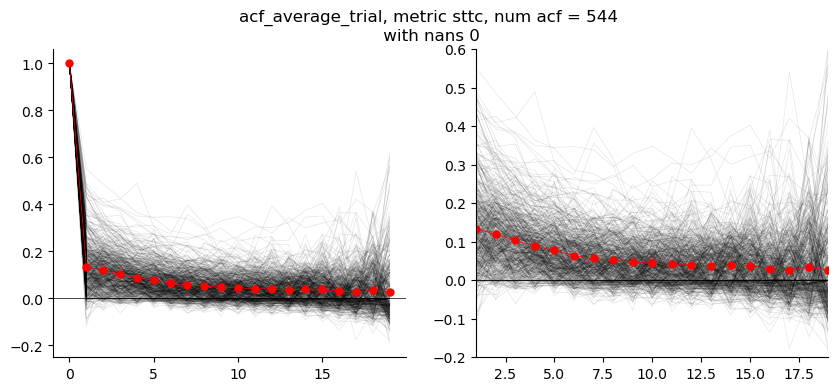

In [13]:
plot_acf(acf_average_trial_sttc_df, acf_cols, 'sttc', save_fig, save_folder_non_binned)

In [14]:
# for idx, acf_matrix in enumerate(acf_matrix_pearsonr_l):
#     unit_id = int(acf_average_trial_pearsonr_df.iloc[idx]['unit_id'])
#     plot_acf_heatmap(acf_matrix, 'pearsonr', unit_id, save_folder_binned)

In [15]:
for idx, acf_matrix in enumerate(acf_matrix_sttc_l):
    unit_id = int(acf_average_trial_sttc_df.iloc[idx]['unit_id'])
    plot_acf_heatmap(acf_matrix, 'sttc', unit_id, save_folder_non_binned)